Problem statement: What is the cost of Building, deploying and maintaining the model vs amount it is saving.

Now data collection

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report

In [4]:
df = pd.read_csv("/content/loan_data_set.csv")

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LN00001,Female,Yes,0,Not Graduate,No,16663,4492,222,180,1.0,Semiurban,N
1,LN00002,Female,No,1,Not Graduate,Yes,3633,3558,698,120,1.0,Semiurban,N
2,LN00003,Male,Yes,0,Not Graduate,No,10149,9813,228,240,1.0,Semiurban,N
3,LN00004,Female,No,1,Not Graduate,Yes,16671,3658,622,120,0.0,Semiurban,N
4,LN00005,Female,Yes,3+,Not Graduate,No,6701,2694,546,120,0.0,Rural,Y


In [6]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [7]:
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='Gender', ylabel='count'>

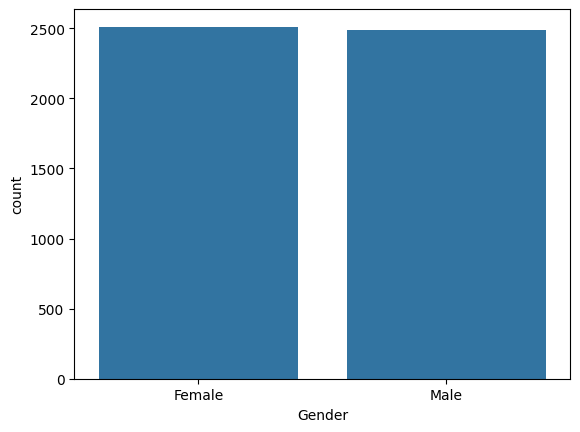

In [8]:
sns.countplot(x = df.Gender, data = df)

<Axes: xlabel='Married', ylabel='count'>

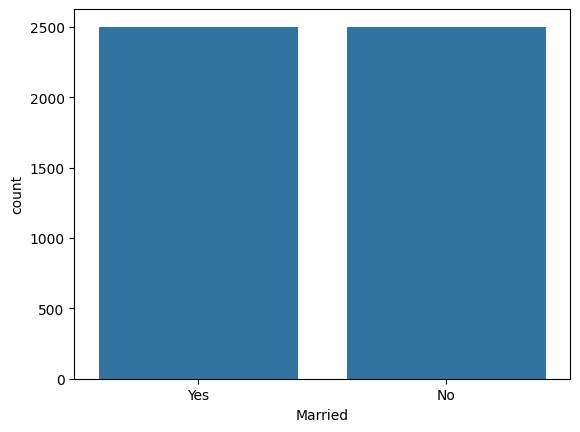

In [9]:
sns.countplot(x = df.Married, data = df)

<Axes: xlabel='Dependents', ylabel='count'>

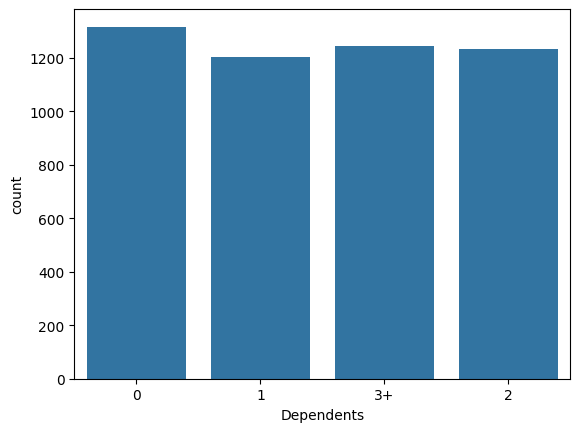

In [10]:
sns.countplot(x = df.Dependents, data = df)

<Axes: xlabel='Education', ylabel='count'>

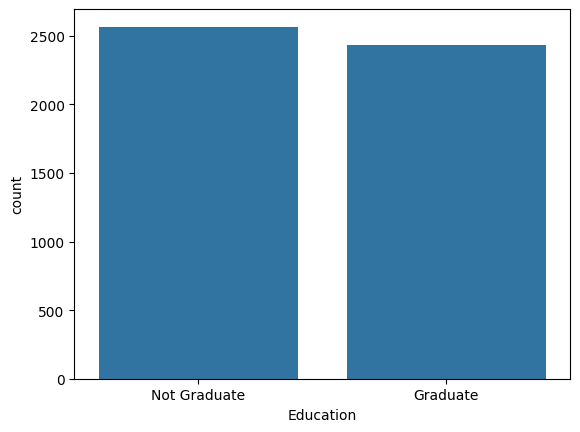

In [11]:
sns.countplot(x = df.Education, data = df)


<Axes: xlabel='Self_Employed', ylabel='count'>

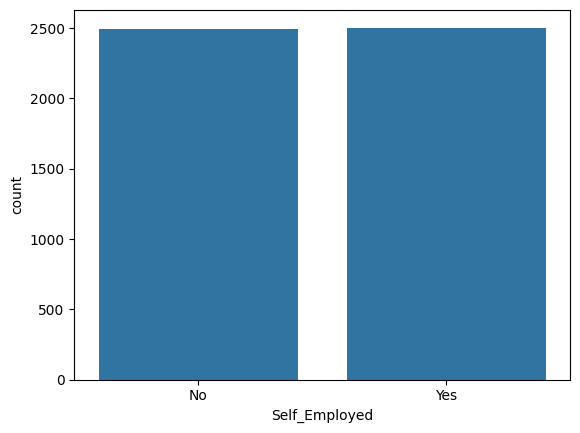

In [12]:
sns.countplot(x = df.Self_Employed, data = df)

<Axes: xlabel='Loan_Status', ylabel='count'>

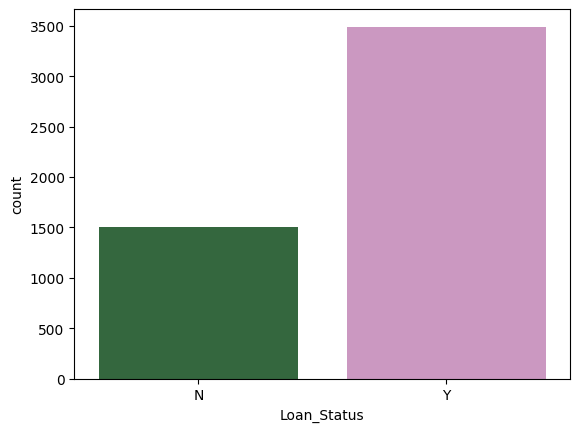

In [13]:
sns.countplot(x = df.Loan_Status, data = df, palette="cubehelix")

In [14]:
count_approved = df[df['Loan_Status'] == 'Y'].shape[0]
count_not_approved = df[df['Loan_Status'] == 'N'].shape[0]

In [15]:
print(count_approved)
print(count_not_approved)

3491
1509


In [16]:
approved_percentage = (df['Loan_Status'].value_counts(normalize=True)['Y']) * 100
print("Percentage of loan approved:", round(approved_percentage, 2), "%")

Percentage of loan approved: 69.82 %


In [17]:
print("Percentage of loan not approved: {:.2f}%".format((count_not_approved / (len(df.Loan_Status)) * 100)))

Percentage of loan not approved: 30.18%


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            5000 non-null   object 
 1   Gender             5000 non-null   object 
 2   Married            5000 non-null   object 
 3   Dependents         5000 non-null   object 
 4   Education          5000 non-null   object 
 5   Self_Employed      5000 non-null   object 
 6   ApplicantIncome    5000 non-null   int64  
 7   CoapplicantIncome  5000 non-null   int64  
 8   LoanAmount         5000 non-null   int64  
 9   Loan_Amount_Term   5000 non-null   int64  
 10  Credit_History     5000 non-null   float64
 11  Property_Area      5000 non-null   object 
 12  Loan_Status        5000 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 507.9+ KB


In [19]:
num_features = df[["ApplicantIncome","CoapplicantIncome","LoanAmount"]]

In [20]:
num_features.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,5000.000000,5000.000000,5000.000000
mean,11255.706000,5010.092800,378.141800
std,5233.045835,2886.317402,189.165293
min,2003.000000,0.000000,50.000000
25%,6695.000000,2513.750000,213.750000
50%,11476.500000,4993.000000,382.500000
75%,15803.500000,7514.750000,546.000000
max,19999.000000,9998.000000,699.000000


<Axes: xlabel='ApplicantIncome', ylabel='Count'>

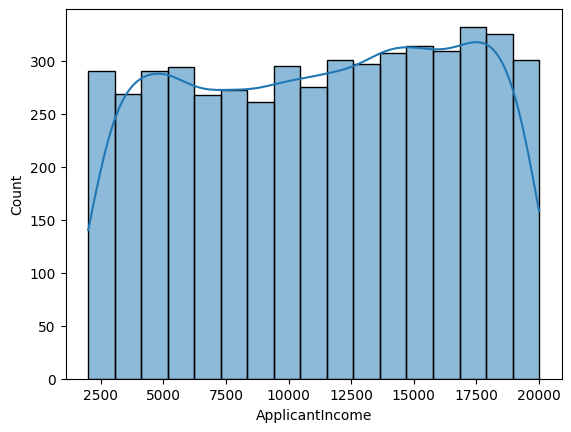

In [21]:
# distribution
sns.histplot(df.ApplicantIncome, kde=True)

<Axes: xlabel='LoanAmount', ylabel='Count'>

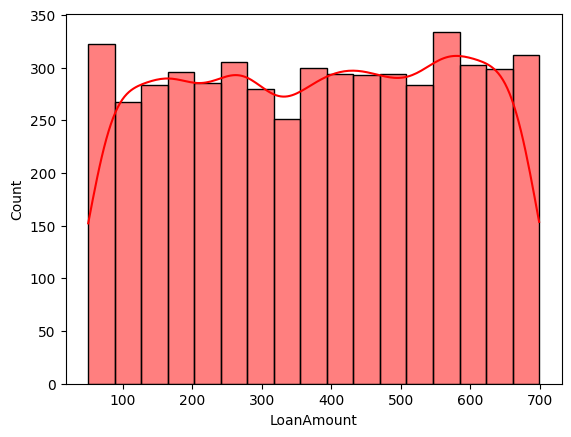

In [22]:
sns.histplot(df.LoanAmount, kde=True, color='red')

<Axes: xlabel='LoanAmount', ylabel='Density'>

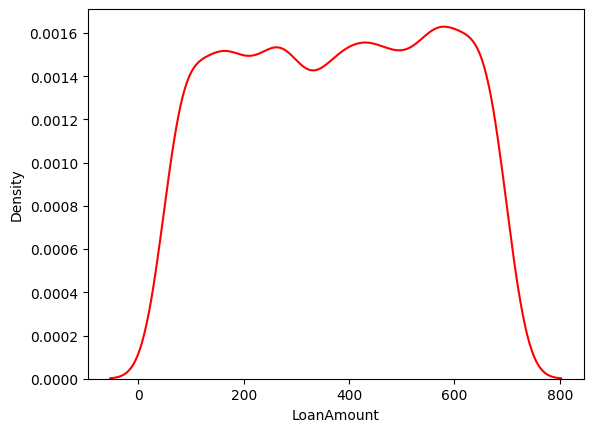

In [23]:
sns.kdeplot(x=df.LoanAmount, color='red')

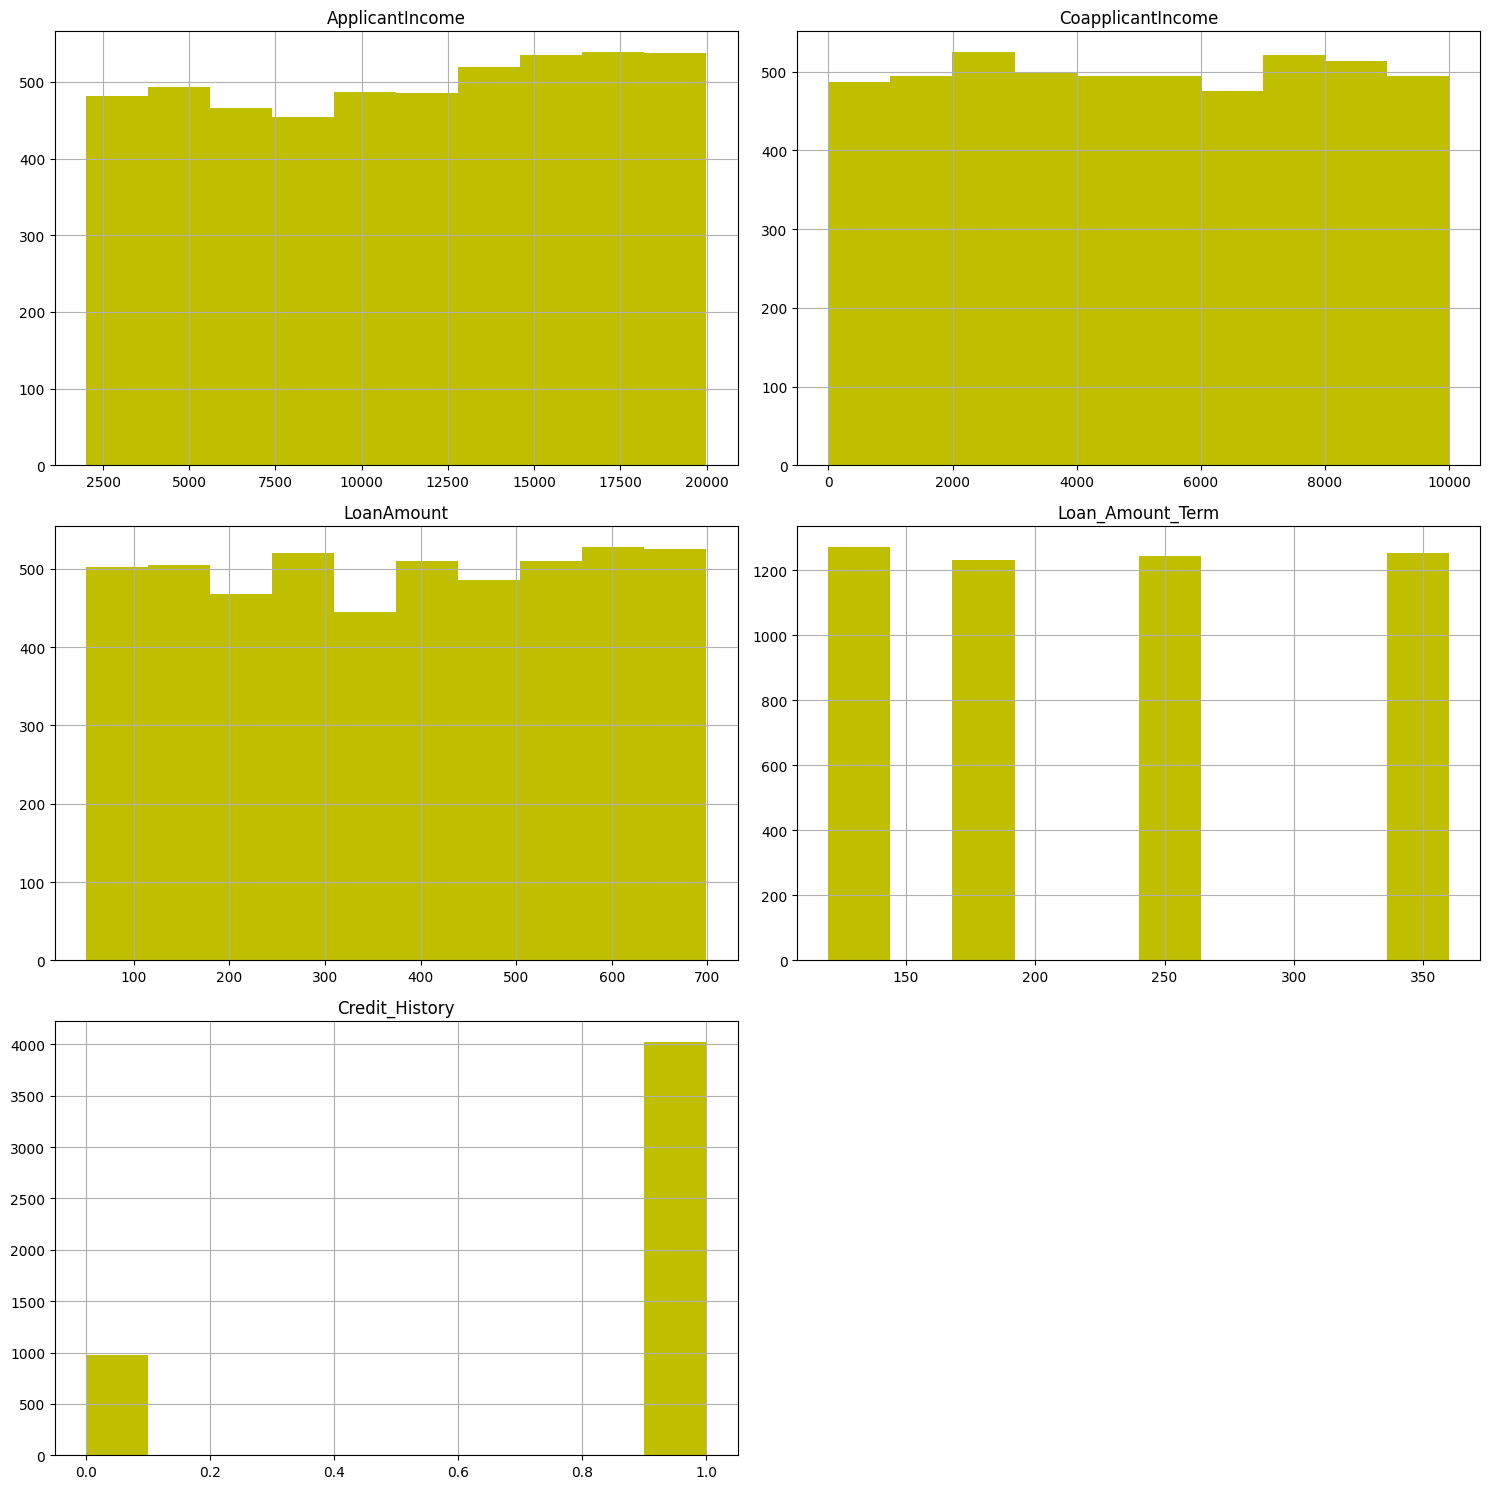

In [24]:
df.hist(figsize=(15,15), color="y")
plt.tight_layout()
plt.show()

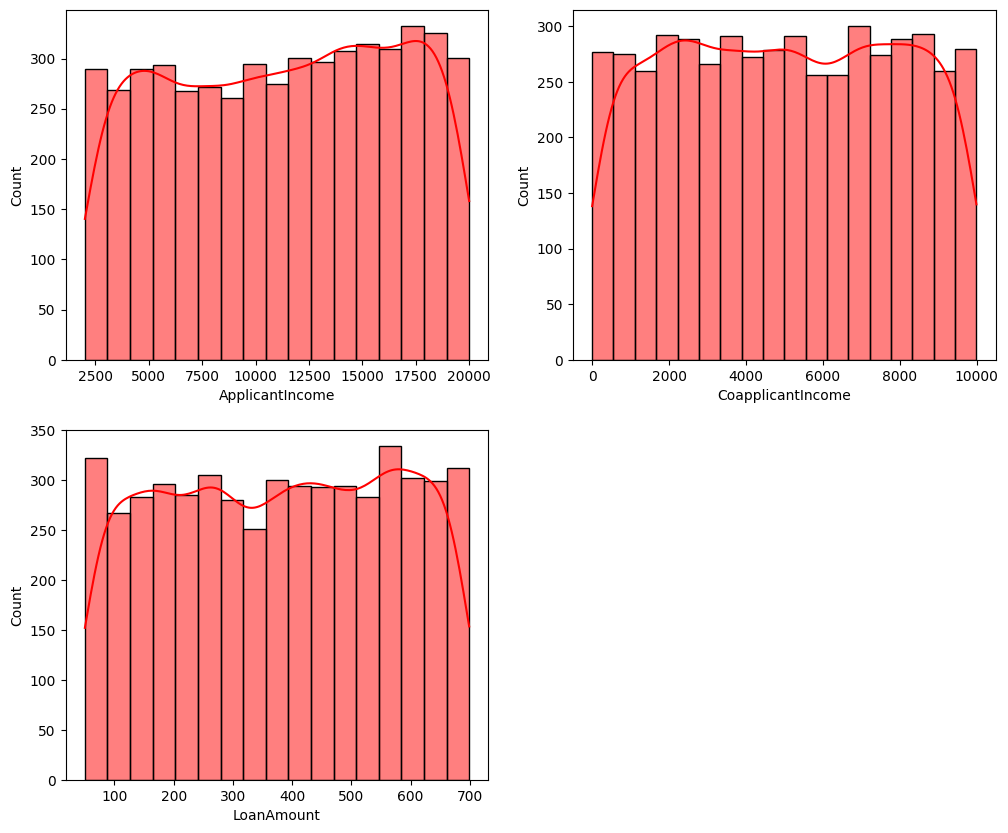

In [25]:
plt.figure(figsize=(12,10))
for i in range(0,len(num_features.columns)):
  plt.subplot(2,2,i+1)
  sns.histplot(num_features.iloc[:,i], kde=True, color='Red')


<Axes: >

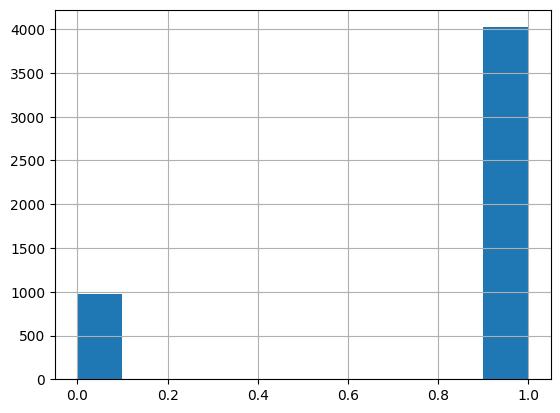

In [26]:
df.Credit_History.hist()

<Axes: ylabel='ApplicantIncome'>

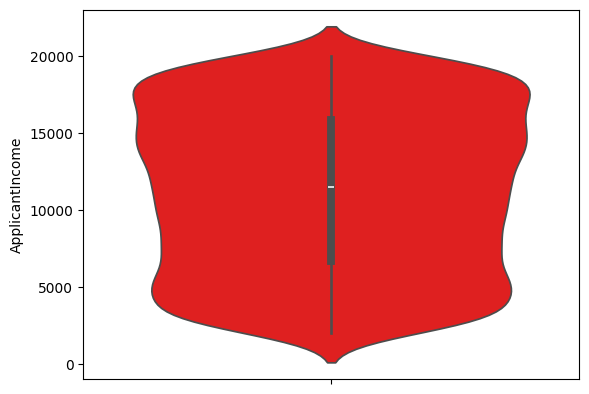

In [27]:
#univariate analysis
sns.violinplot(data = df, y=df.ApplicantIncome, color='red')

<Axes: ylabel='CoapplicantIncome'>

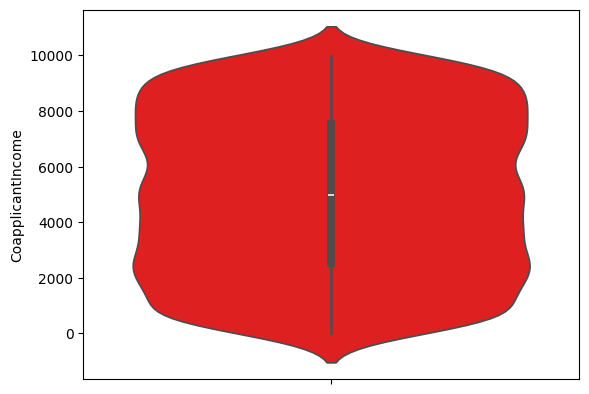

In [28]:
sns.violinplot(data = df, y=df.CoapplicantIncome, color='red')

<Axes: ylabel='LoanAmount'>

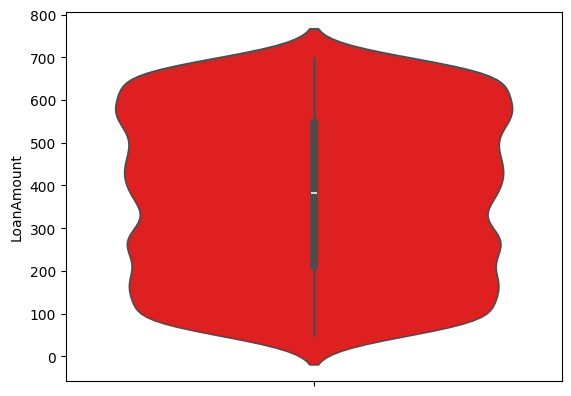

In [29]:
sns.violinplot(data = df, y=df.LoanAmount, color='red')

<Axes: xlabel='Gender'>

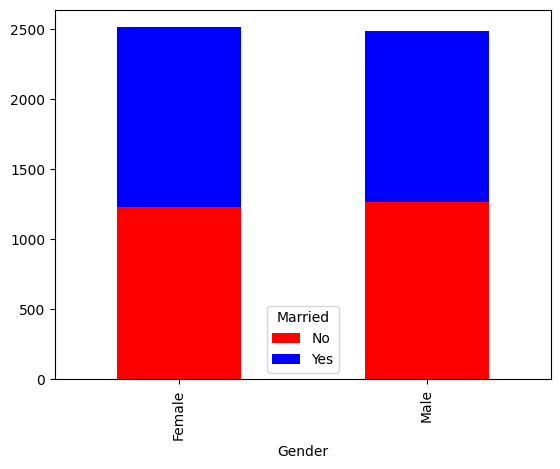

In [30]:
#Bivariate analysis
pd.crosstab(df.Gender, df.Married).plot(kind='bar', stacked=True, color=['red','blue'])

<Axes: xlabel='Self_Employed'>

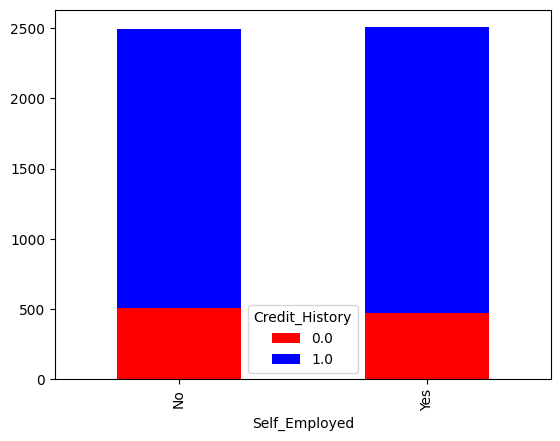

In [31]:
pd.crosstab(df.Self_Employed, df.Credit_History).plot(kind='bar', stacked=True, color=['red','blue'])

<Axes: xlabel='Gender'>

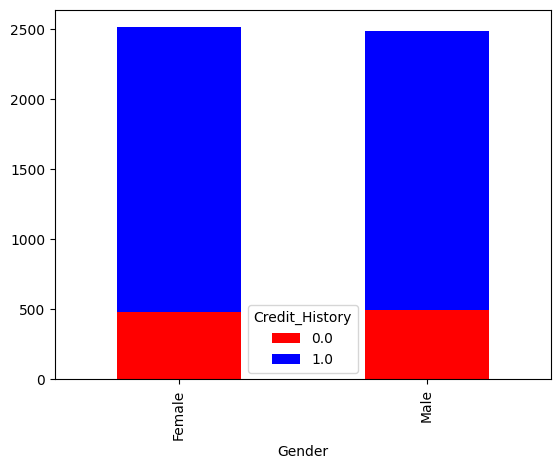

In [32]:
pd.crosstab(df.Gender, df.Credit_History).plot(kind='bar', stacked=True, color=['red','blue'])

<Axes: xlabel='Dependents'>

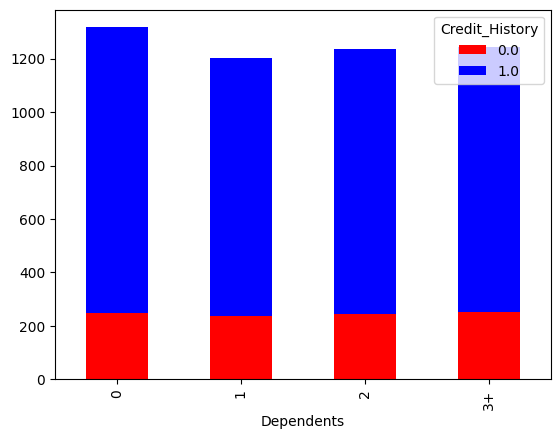

In [33]:
pd.crosstab(df.Dependents, df.Credit_History).plot(kind='bar', stacked=True, color=['red','blue'])

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

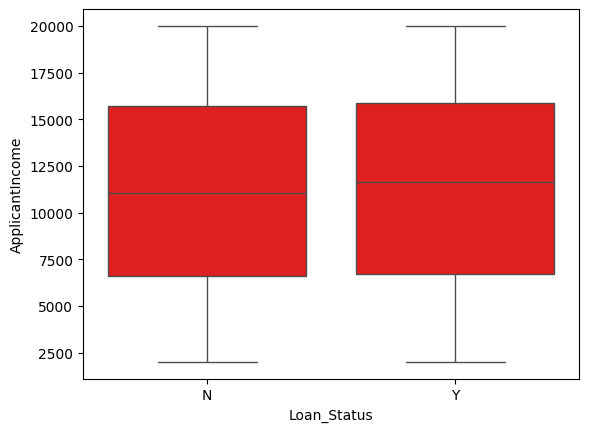

In [34]:
sns.boxplot(x= df.Loan_Status , y=df.ApplicantIncome, color='red')

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

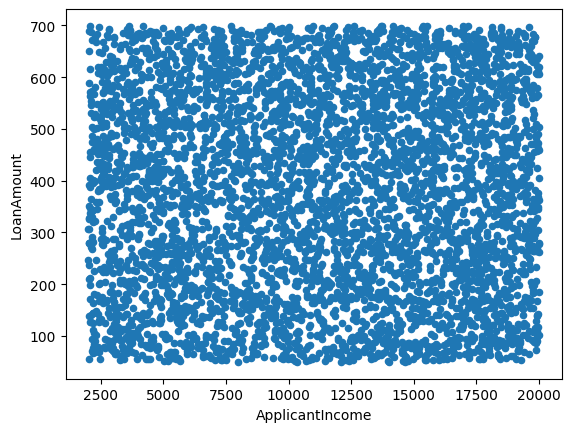

In [35]:
df.plot(x = "ApplicantIncome", y = "LoanAmount", kind = "scatter")

In [36]:
print("The pearson's corelation constant is:", df.ApplicantIncome.corr(df.LoanAmount))

The pearson's corelation constant is: -0.0015994293758209142


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            5000 non-null   object 
 1   Gender             5000 non-null   object 
 2   Married            5000 non-null   object 
 3   Dependents         5000 non-null   object 
 4   Education          5000 non-null   object 
 5   Self_Employed      5000 non-null   object 
 6   ApplicantIncome    5000 non-null   int64  
 7   CoapplicantIncome  5000 non-null   int64  
 8   LoanAmount         5000 non-null   int64  
 9   Loan_Amount_Term   5000 non-null   int64  
 10  Credit_History     5000 non-null   float64
 11  Property_Area      5000 non-null   object 
 12  Loan_Status        5000 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 507.9+ KB


In [38]:
num_features = ["ApplicantIncome","CoapplicantIncome","LoanAmount","Credit_History"]
num_df = df[num_features]

<Axes: >

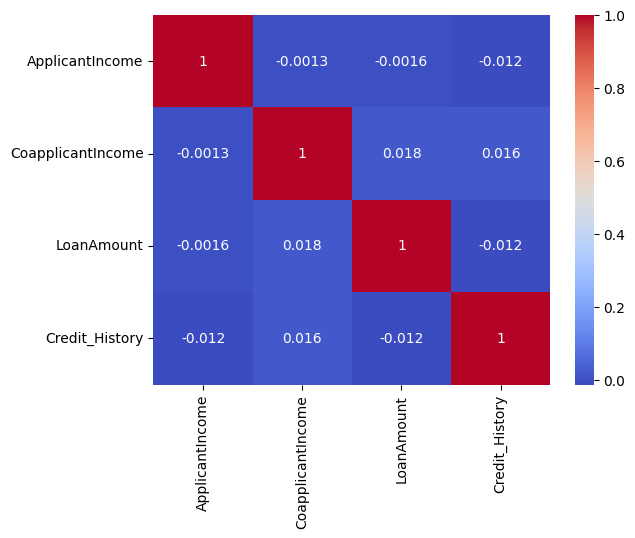

In [39]:
#multivariate analysis
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')

In [40]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [41]:
#Data Preprossesing

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
ohe = OneHotEncoder()

In [42]:
df.drop(["Loan_ID"], axis=1, inplace=True)

In [43]:
df_1 = df.copy()

In [44]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             5000 non-null   object 
 1   Married            5000 non-null   object 
 2   Dependents         5000 non-null   object 
 3   Education          5000 non-null   object 
 4   Self_Employed      5000 non-null   object 
 5   ApplicantIncome    5000 non-null   int64  
 6   CoapplicantIncome  5000 non-null   int64  
 7   LoanAmount         5000 non-null   int64  
 8   Loan_Amount_Term   5000 non-null   int64  
 9   Credit_History     5000 non-null   float64
 10  Property_Area      5000 non-null   object 
 11  Loan_Status        5000 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 468.9+ KB


In [45]:
df = pd.get_dummies(df , dtype=int, drop_first=True)

In [46]:
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,16663,4492,222,180,1.0,0,1,0,0,0,1,0,1,0,0
1,3633,3558,698,120,1.0,0,0,1,0,0,1,1,1,0,0
2,10149,9813,228,240,1.0,1,1,0,0,0,1,0,1,0,0
3,16671,3658,622,120,0.0,0,0,1,0,0,1,1,1,0,0
4,6701,2694,546,120,0.0,0,1,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,11249,31,131,360,1.0,1,1,0,0,0,1,1,0,0,1
4996,16155,714,56,240,1.0,0,0,0,0,1,1,0,0,1,1
4997,18080,7955,231,240,0.0,1,0,0,0,0,1,1,1,0,1
4998,4042,9231,575,180,1.0,1,1,0,0,1,1,0,1,0,0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          5000 non-null   int64  
 1   CoapplicantIncome        5000 non-null   int64  
 2   LoanAmount               5000 non-null   int64  
 3   Loan_Amount_Term         5000 non-null   int64  
 4   Credit_History           5000 non-null   float64
 5   Gender_Male              5000 non-null   int64  
 6   Married_Yes              5000 non-null   int64  
 7   Dependents_1             5000 non-null   int64  
 8   Dependents_2             5000 non-null   int64  
 9   Dependents_3+            5000 non-null   int64  
 10  Education_Not Graduate   5000 non-null   int64  
 11  Self_Employed_Yes        5000 non-null   int64  
 12  Property_Area_Semiurban  5000 non-null   int64  
 13  Property_Area_Urban      5000 non-null   int64  
 14  Loan_Status_Y           

In [49]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,16663,4492,222,180,1.0,0,1,0,0,0,1,0,1,0,0
1,3633,3558,698,120,1.0,0,0,1,0,0,1,1,1,0,0
2,10149,9813,228,240,1.0,1,1,0,0,0,1,0,1,0,0
3,16671,3658,622,120,0.0,0,0,1,0,0,1,1,1,0,0
4,6701,2694,546,120,0.0,0,1,0,0,1,1,0,0,0,1


In [48]:
# as there are no outliers so no need for its treatment if there were ouliers use IQR

#q1 = df.Loanamount().quantile(0.25)
#q3 = df.Loanamount().quantile(0.75)
#IQR = q3 - q1
#UV = q3+1.5iqr
#LV = q1+1.5iqr

<Axes: xlabel='Loan_Status_Y', ylabel='Count'>

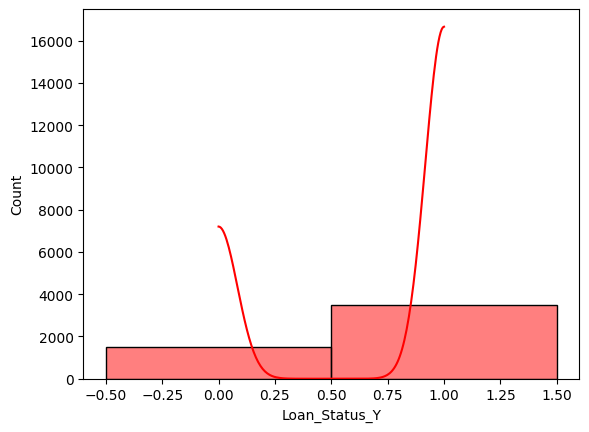

In [52]:
# As data follows normal distribution so no need of transformation (sq root, log transformation etc).
#for medium skewness use sq root, for high skewness use log transformation.
#df["Loan_Amount_Term"] = np.sqrt.df["Loan_Amount_Term"]

sns.histplot(df["Loan_Status_Y"], discrete=True, color='red', kde=True)

In [53]:
X = df.drop(["Loan_Status_Y"], axis=1)
y = df["Loan_Status_Y"]

In [55]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,16663,4492,222,180,1.0,0,1,0,0,0,1,0,1,0
1,3633,3558,698,120,1.0,0,0,1,0,0,1,1,1,0
2,10149,9813,228,240,1.0,1,1,0,0,0,1,0,1,0
3,16671,3658,622,120,0.0,0,0,1,0,0,1,1,1,0
4,6701,2694,546,120,0.0,0,1,0,0,1,1,0,0,0


In [57]:
y.head()

,Loan_Status_Y
0,0
1,0
2,0
3,0
4,1


In [58]:
X.shape, y.shape

((5000, 14), (5000,))

In [61]:
from imblearn.over_sampling import SMOTE
x, y = SMOTE().fit_resample(X, y)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

<Axes: xlabel='count', ylabel='Loan_Status_Y'>

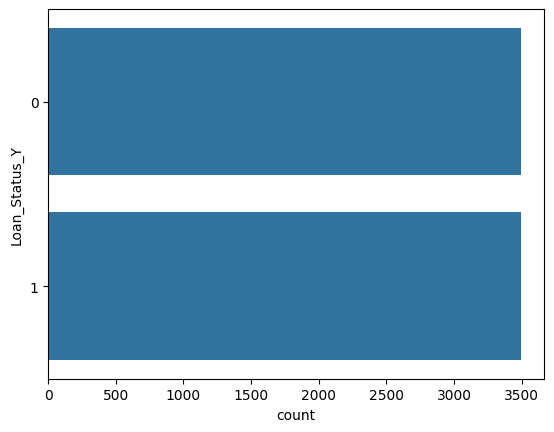

In [63]:
sns.countplot( y = y , data =df )

In [ ]:
#As the data is already normalized so no need of scaling

In [65]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [66]:
model.fit(X_train, y_train)

LogisticRegression()

In [67]:
y_pred = model.predict(X_test)

In [69]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [73]:
print("The accuracy score is:", accuracy_score(y_test, y_pred))
print("The confusion matrix is:")
print(confusion_matrix(y_test, y_pred))
print("The classification report is:")
print(classification_report(y_test, y_pred))

The accuracy score is: 0.6671438797423049
The confusion matrix is:
[[442 242]
 [223 490]]
The classification report is:
              precision    recall  f1-score   support

           0       0.66      0.65      0.66       684
           1       0.67      0.69      0.68       713

    accuracy                           0.67      1397
   macro avg       0.67      0.67      0.67      1397
weighted avg       0.67      0.67      0.67      1397

